In [1]:
import sys, os, pickle, time, re
from glob import glob
sys.path.append('../lib')
sys.path.append('../analysis')

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array

import ROOT as rt
rt.TGaxis.SetMaxDigits(4)
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)
import ROOT.RooFit as rf
import root_numpy as rtnp

from analysis_utilities import drawOnCMSCanvas, getEff, DSetLoader
from histo_utilities import create_TH1D, create_TH2D, SetMaxToMaxHist
from gridVarQ2Plot import col_dic, label_dic
from progressBar import ProgressBar
from categoriesDef import categories

from lumi_utilities import getLumiByTrigger

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1


CMS_lumi.extraText = 6*' ' + 'Simulation Internal'

donotdelete = []

In [3]:
cl = rt.TLine()
cl.SetLineColor(6)
cl.SetLineStyle(9)
cl.SetLineWidth(2)

In [7]:
dsMu = DSetLoader('B0_MuNuDmst_PU20')
dfMu = pd.DataFrame(rtnp.root2array(dsMu.skimmed_dir+'/None.root'))

In [8]:
dsTau = DSetLoader('B0_TauNuDmst_PU20')
dfTau = pd.DataFrame(rtnp.root2array(dsTau.skimmed_dir+'/None.root'))

In [11]:
' '.join(dfMu.columns[1:])

'q2 Est_mu M2_miss mu_pt mu_eta mu_phi mu_sigdxy B_pt B_eta B_phi Dst_pt Dst_eta Dst_phi D0_pt D0_eta D0_phi pi_pt pi_eta pi_phi pi_IP K_pt K_eta K_phi K_IP pval_piK sigdxy_vtxD0_PV pis_pt pis_eta pis_phi pis_IP pval_D0pis mass_piK mass_D0pis mass_D0pismu pval_D0pismu cos_D0pismu_PV cosT_D0pismu_PV N_lowMassAddTks tkMassHad_0 tkMassHad_1 tkMassMuTk_0 tkMassMuTk_1 tkPt_0 tkPt_1 cat_low cat_mid cat_high N_vtx MC_q2 MC_Est_mu MC_M2_miss MC_B_pt MC_B_eta MC_B_phi MC_Dst_pt MC_Dst_eta MC_Dst_phi MC_mu_pt MC_mu_eta MC_mu_phi MC_mu_IP MC_idxMatch wh_CLNCentral wh_CLNR0Down wh_CLNR0Up wh_CLNR1Down wh_CLNR1Up wh_CLNR2Down wh_CLNR2Up wh_CLNRhoSqDown wh_CLNRhoSqUp'

# General plots

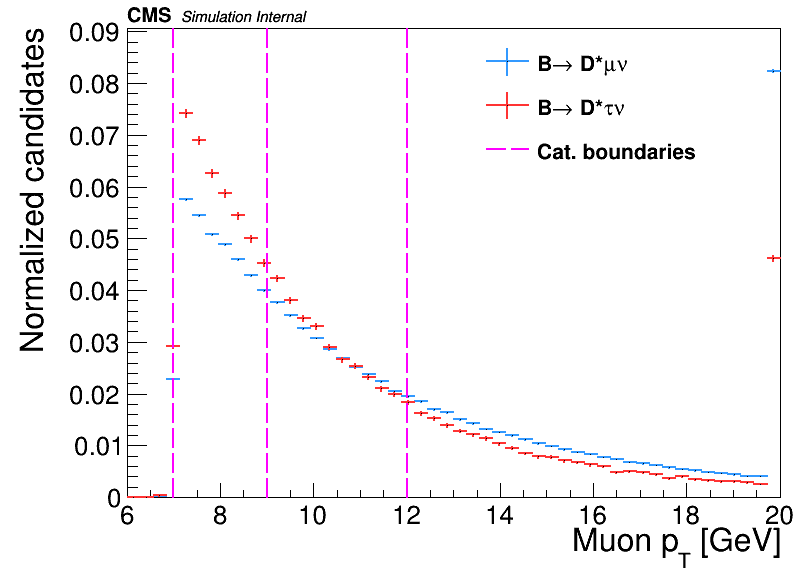

In [25]:
leg = rt.TLegend(0.6, 0.7, 0.9, 0.93)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

sel = np.abs(dfMu['mu_eta']) < 1.5
hMu = create_TH1D(dfMu['mu_pt'][sel], 
                  binning=[50,6,20], 
                  axis_title=['Muon p_{T} [GeV]', 'Normalized candidates'],
                  scale_histo='norm',
                  opt='overflow+underflow'
                 )
hMu.SetLineColor(col_dic['mu'])
leg.AddEntry(hMu, label_dic['mu'], 'lep')

sel = np.abs(dfTau['mu_eta']) < 1.5
hTau = create_TH1D(dfTau['mu_pt'][sel], 'tau', binning=hMu.binning,
                   opt='overflow+underflow',
                   scale_histo='norm')
hTau.SetLineColor(col_dic['tau'])
leg.AddEntry(hTau, label_dic['tau'], 'lep')

h_list = [hMu, hTau]

m = SetMaxToMaxHist(h_list)
c = drawOnCMSCanvas(CMS_lumi, h_list, 'same')

cl.DrawLine(7, 0, 7, m)
cl.DrawLine(9, 0, 9, m)
cl.DrawLine(12, 0, 12, m)
leg.AddEntry(cl, 'Cat. boundaries', 'l')

leg.Draw()